# $k$-means Clustering

The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centroids, one for each cluster.

The main steps are:

Initialization: Randomly initialize K cluster centroids.
Assignment step: Assign each example to the closest cluster centroid.
Move centroid step: Compute the new centroid (mean) of each cluster.

# Application

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df= pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\heart.csv")
df= df.dropna()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


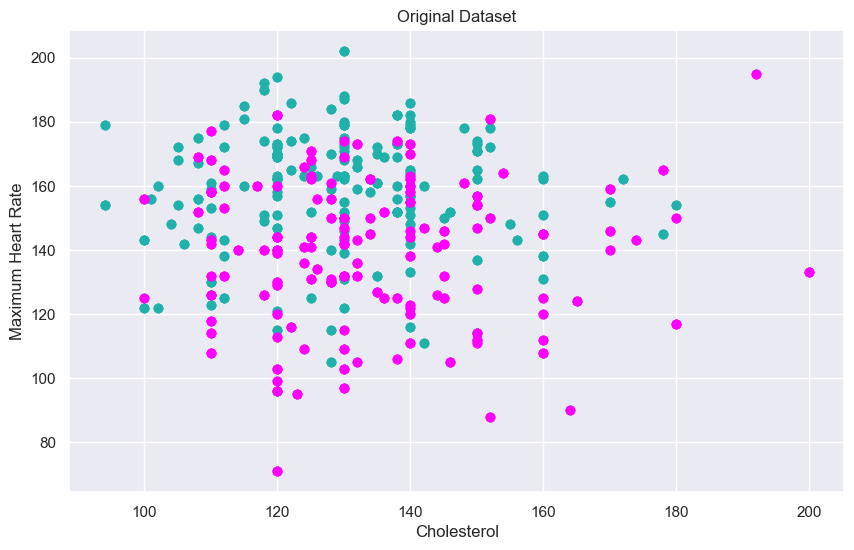

In [70]:
die = df[df['target'] == 1]
live = df[df['target'] == 0]


plt.figure(figsize=(10, 6))
plt.scatter(die['trestbps'], 
            die['thalach'], 
            color='lightseagreen', 
            label='Above 3.5 College GPA')

plt.scatter(live['trestbps'], 
            live['thalach'], 
            color='magenta', 
            label='Below 3.5 College GPA')

plt.title('Original Dataset')
plt.xlabel('Cholesterol')
plt.ylabel('Maximum Heart Rate')
plt.show()

This is how the original data looks like. The sea green represents someone who had a heart attack, while the magenta represents someone who did not have a heart attack. For the sake of this notebook, let's ignore the fact that we have these lables.

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.loc[:, ['trestbps', 'thalach']]

In [78]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters
kmeans.fit(X)
labels = kmeans.predict(X_standardized_df)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_


c:\Users\faith\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



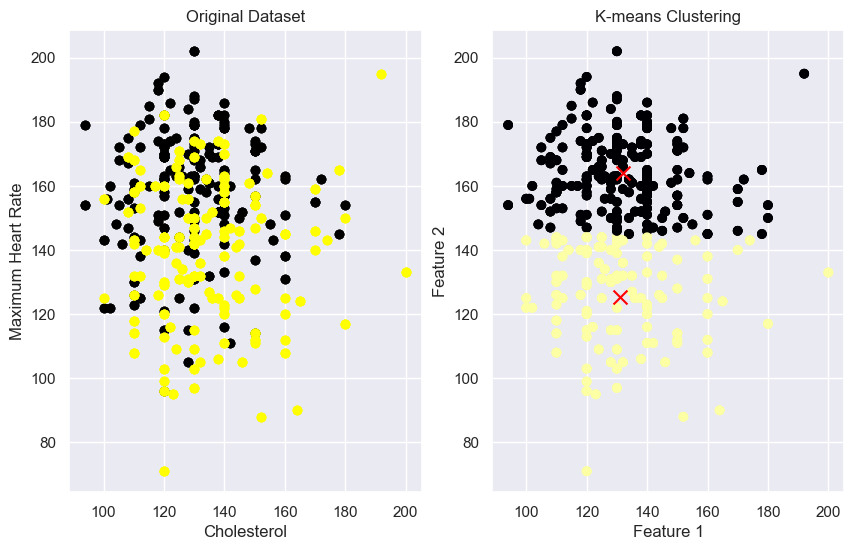

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 6))


ax1.scatter(die['trestbps'], 
            die['thalach'], 
            color='black', 
            label='Above 3.5 College GPA')

ax1.scatter(live['trestbps'], 
            live['thalach'], 
            color='yellow', 
            label='Below 3.5 College GPA')

ax1.set_title('Original Dataset')
ax1.set_xlabel('Cholesterol')
ax1.set_ylabel('Maximum Heart Rate')

ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='inferno')
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
ax2.set_title('K-means Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.show()

So not bad! I think something really funny about K-means is that it will literally just consider the datapoints closest to the centroid as part of the cluster. This is why you see such a hard divide between the two sides on the cluster side, while there is a lot more overlap on the original dataset side.

# Error analysis